In [ ]:
import numpy as np
import pandas as pd
from methods.methods import K_Means, BASC_A, onestep, shmulevich
import matplotlib.pyplot as plt
from scipy import interpolate

: 

In [2]:
# function to interpolate only n (iter) number of times
# argumenrs: vect - gene expression, method - method to use, iter - number of iterations
def interpolation(vect, method, iterr=4):

    thr = []

    # size of gene
    n = (len(vect) - 1)
    
    x = np.arange(len(vect))
    #edit s later if necessary
    bspl = interpolate.CubicSpline(x, vect)

    # size of the first interpolation
    newSize = len(vect) + (len(vect) - 1)

    gene = vect
    sample = []

    # for loop to interpolate iter times and save thresholds 
    for i in range(iterr):

        # sample size
        #sample.append(newSize)

        # indices of gene
        indices = np.linspace(0, len(vect) - 1, len(gene) + n)

        # interpolate gene expression with a new size
        
        #pick samples from 
        interpolated_values = bspl(indices)
        
        #print(indices, "\n")
        
        gene = interpolated_values
        
        # get the threshold based on the method
        #if(method == 'K-Means'):
        #    thr.append(K_Means(gene))
        #elif(method == 'BASC A'):
        #    t = BASC_A(gene)
        #    thr.append(t)
        #elif(method == 'Onestep'):
        #    thr.append(onestep(gene))
        #else:
        #    thr.append(shmulevich(gene))
        
        # update variables
        n = len(gene) - 1
        #n = newSize - 1

        # new size of the next interpolation
        #newSize = newSize + (newSize-1)
    
    return gene

In [3]:
# read matrix of gene expressions
data = pd.read_csv('matrix.csv', header=None)

In [4]:
data

,0,1,2,3,4
0,2404.2,2865.7,2798.4,2080.5,2526.5
1,2019.6,1133.4,1099.9,1696.7,1861.2
2,65.4,95.4,81.3,93.0,14.9
3,577.2,526.9,575.8,499.1,360.8
4,24.1,8.2,58.3,24.4,4.7
...,...,...,...,...,...
54608,7.5,9.5,6.1,7.7,12.0
54609,254.8,224.4,243.9,210.3,233.0
54610,28.8,20.6,93.1,48.9,35.1
54611,92.2,109.3,52.1,193.4,101.0


In [5]:
# get first gene
gene_exp = data.iloc[0].values

In [6]:
gene_exp

array([2404.2, 2865.7, 2798.4, 2080.5, 2526.5])

In [7]:
# compute thresholds based on methods

thr_b = BASC_A(gene_exp)
thr_k = K_Means(gene_exp)
thr_o = onestep(gene_exp)
thr_s = shmulevich(gene_exp)

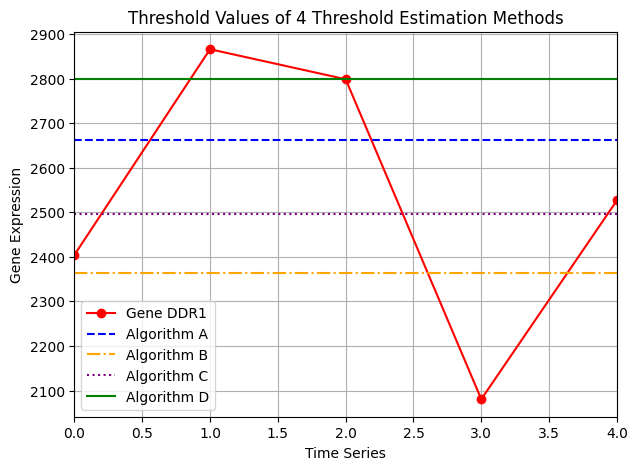

In [13]:
# plot the model uncertainty of thresholds

plt.figure(figsize=(7, 5))
plt.plot(np.arange(0, len(gene_exp)), gene_exp, color='red', marker='o', label='Gene DDR1')
plt.plot(np.arange(0, len(gene_exp)), np.full(len(gene_exp), thr_b), color='blue', 
         linestyle='--', label='Algorithm A')
plt.plot(np.arange(0, len(gene_exp)), np.full(len(gene_exp), thr_k), color='orange', 
         linestyle='-.', label='Algorithm B')
plt.plot(np.arange(0, len(gene_exp)), np.full(len(gene_exp), thr_o), color='purple', 
         linestyle=':', label='Algorithm C')
plt.plot(np.arange(0, len(gene_exp)), np.full(len(gene_exp), thr_s), color='green', label='Algorithm D')
plt.legend()
plt.title("Threshold Values of 4 Threshold Estimation Methods")
plt.xlabel("Time Series")
plt.ylabel("Gene Expression")
plt.xlim(0,4)
plt.grid(True)
plt.savefig('model-uncertainty.png')

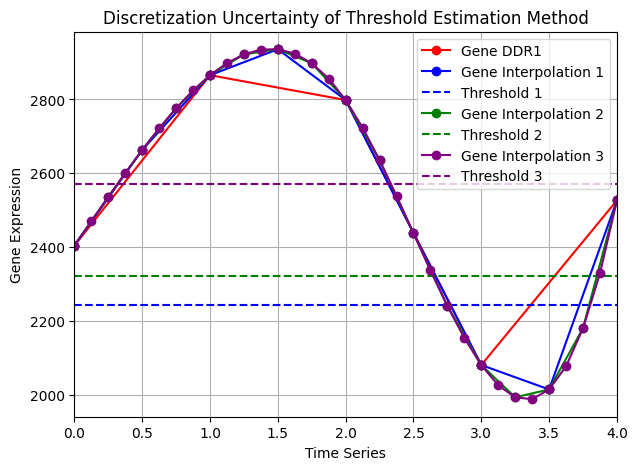

In [12]:
# plot the discretization uncertainty

colors = ['blue', 'green', 'purple']

plt.figure(figsize=(7, 5))
plt.plot(np.arange(0, len(gene_exp)), gene_exp, color='red', marker='o', label='Gene DDR1')

for i in range(1, 4):
    gene = interpolation(gene_exp, None, i)
    thr = BASC_A(gene)
    
    plt.plot(np.linspace(0, len(gene_exp)-1, len(gene)), gene, color=colors[i-1], marker='o', label=f"Interpolation {i}")
    
    plt.plot(np.arange(0, len(gene_exp)), np.full(len(gene_exp), thr), color=colors[i-1], linestyle='--', label=f"Threshold {i}")

# Customize the plot
plt.legend()
plt.title("Discretization Uncertainty of Threshold Estimation Method")
plt.xlabel("Time Series")
plt.ylabel("Gene Expression")
plt.xlim(0,4)
plt.grid(True)
plt.savefig('discretization.png')